In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder

In [2]:
# load data
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')


In [3]:
df_train.columns

Index(['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Views', 'Likes', 'Stream', 'Album_type', 'Licensed',
       'official_video', 'id', 'Track', 'Album', 'Uri', 'Url_spotify',
       'Url_youtube', 'Comments', 'Description', 'Title', 'Channel',
       'Composer', 'Artist'],
      dtype='object')

In [4]:
df_train.dtypes

Danceability        float64
Energy              float64
Key                 float64
Loudness            float64
Speechiness         float64
Acousticness        float64
Instrumentalness    float64
Liveness            float64
Valence             float64
Tempo               float64
Duration_ms         float64
Views               float64
Likes               float64
Stream              float64
Album_type           object
Licensed             object
official_video       object
id                    int64
Track                object
Album                object
Uri                  object
Url_spotify          object
Url_youtube          object
Comments            float64
Description          object
Title                object
Channel              object
Composer             object
Artist               object
dtype: object

In [5]:
def create_dictionary(keys):
    dictionary = {}
    for key in keys:
        dictionary[key] = None  
    return dictionary


def data_process_keep_only_numerical(input_data):
    numeric_columns = input_data.select_dtypes(include=['int64', 'float64'])
    return numeric_columns

def word_dictionary(arr_columns, input_train, input_test):
    # Append the two DataFrames
    appended_df = pd.concat([input_train, input_test])
    appended_df.reset_index(drop=True, inplace=True)
    arr_word_dict = {}
    for col in arr_columns:
        uniq_tmp = appended_df[col].unique()
        arr_dict = {value: value if isinstance(value, (int, float)) and np.isnan(value) else index for index, value in enumerate(uniq_tmp)}
        arr_word_dict[col] = arr_dict
    return arr_word_dict

word_dict = word_dictionary([
    'Album_type', 'Licensed', 'official_video', 'Track', 'Album', 'Uri', 'Url_spotify', 'Url_youtube', 
    'Description', 'Title', 'Channel', 'Composer', 'Artist'], df_train, df_test)

# Using Dictionary:
#   Album_type, Licensed, official_video, Composer, Channel, Artist
# Can be removed:
#   Uri, Url_spotify, Url_youtube
# Cannot use word_dict:
#   Track, Album, Description, Title
# ret_train.head()
# ret_test.head()

In [6]:
word_dict['Album_type']

{'album': 0, nan: nan, 'single': 2, 'compilation': 3}

In [7]:
df_train.tail(40)

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,...,Album,Uri,Url_spotify,Url_youtube,Comments,Description,Title,Channel,Composer,Artist
17130,0.0,0.985075,2.0,-24.726,0.0337,6.814720e-01,0.001360,0.241804,0.0000,82.572,...,White Noise Calming Piano Melodies,NaN,NaN,https://www.youtube.com/watch?v=YU0H88DRnMg,NaN,Provided to YouTube by Revelator Ltd.\n\nWhite...,White Noise Baby Sleep Melody,Sleepy Penguin - Topic,Finneas O'Connell,Post Malone
17131,8.0,0.313047,9.0,-5.516,0.0410,1.381884e-01,0.000015,0.000890,0.2040,119.932,...,Sie weiß (feat. Mero),spotify:track:7DyDjhZMEIK5Ied4juTCyc,NaN,NaN,6836.0,„Sie weiß“ jetzt überall STREAMEN: \nhttps://A...,AYLIVA x MERO - Sie weiß (prod. by Frio & Kyree),AYLIVA,Juicy J,Phoebe Bridgers
17132,4.0,0.096072,5.0,-7.159,0.0374,2.744000e-03,0.000000,0.018191,0.0758,77.525,...,Weisses Herz,spotify:track:1kKvfCmzXzRcfszwQrXFPM,https://open.spotify.com/artist/2rEVnwCPBeGkWM...,https://www.youtube.com/watch?v=3T6pp6bH9HE,3561.0,NaN,AYLIVA - Bei Nacht (prod. by masri),AYLIVA,Louis Bell,NaN
17133,4.0,NaN,2.0,-8.914,0.0613,2.500470e-01,0.000000,0.000359,0.3400,155.110,...,Weisses Herz,spotify:track:41x0eQ9FsOeUNyoqjLJtAX,https://open.spotify.com/artist/2rEVnwCPBeGkWM...,https://www.youtube.com/watch?v=e36m_R5SfkA,38.0,Provided to YouTube by Whiteheart Records/WM G...,Gott sei Dank,NaN,Finneas O'Connell,deadmau5
17134,7.0,NaN,4.0,-7.749,0.0478,1.471980e-04,0.000000,0.001191,0.3070,89.940,...,NaN,spotify:track:0JTz8ZeBJtnjRIWiJnHFdO,https://open.spotify.com/artist/2rEVnwCPBeGkWM...,NaN,5356.0,„Was Besseres“ jetzt überall STREAMEN: \nhttps...,AYLIVA x MUDI - Was Besseres (Official Video),AYLIVA,Mike Dean,Sufjan Stevens
17135,3.0,NaN,9.0,NaN,0.0504,7.880599e-03,0.000000,0.001093,0.0728,82.773,...,Weisses Herz,spotify:track:2jExme1T0ORJ0tL3pq5dhs,https://open.spotify.com/artist/2rEVnwCPBeGkWM...,https://www.youtube.com/watch?v=SU6xmOp8FYY,2487.0,„Schmetterlinge“ jetzt überall STREAMEN: \nhtt...,AYLIVA - Schmetterlinge (prod. by Lee),NaN,Yeti Beats,Kamasi Washington
17136,3.0,0.143878,9.0,NaN,0.0401,1.619428e-02,0.000788,0.040354,NaN,120.105,...,Während du,spotify:track:5MUS9tGxfXLphZRAcyyWnC,https://open.spotify.com/artist/2rEVnwCPBeGkWM...,NaN,2533.0,„Während du“ jetzt überall STREAMEN: \nhttps:/...,AYLIVA - Während du (prod. by masri),AYLIVA,NaN,The Chainsmokers
17137,6.0,0.229221,1.0,-6.998,0.2080,1.860963e-02,0.000000,0.000654,NaN,170.179,...,Weisses Herz,spotify:track:2g4FPrvea8sYly3ihGRgwE,https://open.spotify.com/artist/2rEVnwCPBeGkWM...,https://www.youtube.com/watch?v=H-MiQVcuxGs,5100.0,„Deine Schuld“ jetzt überall STREAMEN: https:/...,AYLIVA - Deine Schuld (prod. by Blurry & Babyb...,AYLIVA,NaN,FKA twigs
17138,6.0,0.273359,10.0,-4.984,0.0575,6.545083e-02,0.000000,0.002147,0.1110,92.903,...,Weisses Herz,spotify:track:3N1jiT8HQrhJQpwfLvy0hA,https://open.spotify.com/artist/2rEVnwCPBeGkWM...,https://www.youtube.com/watch?v=QoTipwnUQZg,5035.0,„Bleib“ jetzt überall STREAMEN: \nhttps://AYLI...,"AYLIVA x MILANO - Bleib (prod. by Sonnek, Tyme)",AYLIVA,Louis Bell,Kanye West
17139,5.0,0.024897,NaN,-10.017,0.0347,1.522733e-01,0.000000,0.005268,0.2390,NaN,...,Weisses Herz,spotify:track:3ahWkIbu2Tl56O75Z4HvXP,https://open.spotify.com/artist/2rEVnwCPBeGkWM...,https://www.youtube.com/watch?v=8ag1FdNfEck,NaN,Provided to YouTube by Whiteheart Records/WM G...,Was du nicht weisst,AYLIVA - Topic,Yeti Beats,NaN


In [8]:
for x in df_train['Uri'].values:
    print(x)

spotify:track:7njAZhca4o80qQdCgyEWya
spotify:track:2nnXe7n3Vivs7OfQKRsfWD
spotify:track:0VQMAup2VdeQWLCvM14Uz2
spotify:track:1M2nd8jNUkkwrc1dgBPTJz
spotify:track:2Ms33RTRCT6gArrpcrPxmo
nan
spotify:track:4lO57zZGFcj7vSY4QhfVDq
spotify:track:5NlFXQ0si6U87gXs6hq81B
spotify:track:0SLtqCrXBRrnkxSOMA3X4W
nan
spotify:track:7jBePLCZlKuEUc3rSc6izU
spotify:track:4dZ3V71vsqSn9MJ18y8YaJ
spotify:track:6yM5jM2eAq3k8NojZ7dLp1
spotify:track:0V5cvmTKsYmF5FmGGEAfmS
spotify:track:18oB9NlhCMSzlte5KAj5tl
spotify:track:5fqYqPWlfQhIkcUY3XAJlm
nan
spotify:track:1GIPP103zfsythULEpsmdw
spotify:track:5sQumEFLTZ7OWMbKg7Pq0J
spotify:track:1e1a7eAlICks9mch3UVsEH
nan
spotify:track:3VtlSKbs0IjVeeRV4otHNT
spotify:track:1gZ7i4qxXkHZb1r6eioaAP
spotify:track:0YImOCkIJ2PWhCXaURCZnY
spotify:track:7gKgd0P3dAAePiSQQBqrlf
spotify:track:1NHwvBmrUje4L1dxfWnXCH
spotify:track:0bzX26mfmUi0djOLemE2b8
spotify:track:47wZfF4OdME3xkIPhhpSSF
spotify:track:3HVJbdz0V402U5YggQK4Ao
spotify:track:6OquGsVTLqZHyxqG0PLwFz
spotify:track:0xDxS2g7

In [9]:
def data_convert(df, word_dict):
    df_ret = df.copy()
    for dic in word_dict:
        print(dic)
        for key_dic in word_dict[dic]:
            df_ret.loc[df_ret[dic] == key_dic, dic] = word_dict[dic][key_dic]
    return df_ret     

In [10]:
df_train_embedding = data_convert(df_train, word_dict)

Album_type
Licensed
official_video
Track
Album
Uri
Url_spotify
Url_youtube
Description
Title
Channel
Composer
Artist


In [11]:
df_test_embedding = data_convert(df_test, word_dict)

Album_type
Licensed
official_video
Track
Album
Uri
Url_spotify
Url_youtube
Description
Title
Channel
Composer
Artist


In [12]:
obj_columns = df_train_embedding.select_dtypes(include=['object']).columns
# print(int_columns)
# convert integer columns to float
df_train_embedding[obj_columns] = df_train_embedding[obj_columns].astype(np.float)

/tmp/ipykernel_784/2578188673.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_train_embedding[obj_columns] = df_train_embedding[obj_columns].astype(np.float)


In [13]:
def corr_matrix_with_threshold(df, threshold, title_str = "Filtered Correlation Matrix (Half Square)"):
    # Add target column to the DataFrame
    corr_matrix = df.corr()
    # Filter the correlation matrix based on the threshold
    filtered_matrix = corr_matrix[corr_matrix.abs() > threshold]
    mask = np.triu(np.ones_like(filtered_matrix, dtype=bool))
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(filtered_matrix, annot=False, fmt=".2f", mask=mask, cmap="coolwarm")
    plt.title(title_str)
    plt.show()


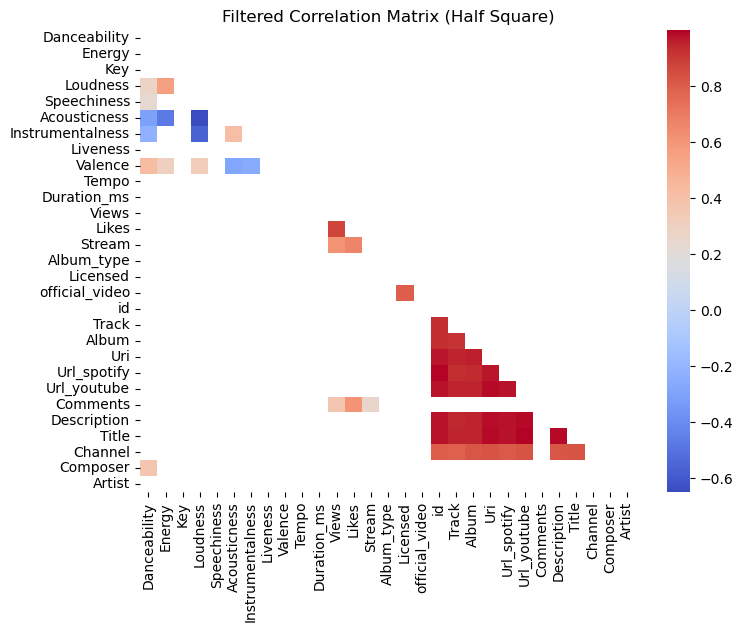

In [14]:
corr_matrix_with_threshold(df_train_embedding, 0.2)

In [15]:
def remove_unimportant_column(df, arr_column):
    df_dropped = df.drop(arr_column, axis=1)
    return df_dropped

In [16]:
arr_NOT_important_column = ['Uri', 'Url_youtube', 'Description', 'id', 'Licensed', 'official_video', 'Title', 'Album']
df_train_embedding_important = remove_unimportant_column(df_train_embedding, arr_NOT_important_column)
df_test_embedding_important = remove_unimportant_column(df_test_embedding, arr_NOT_important_column)

In [17]:
df_train_embedding_important

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,...,Views,Likes,Stream,Album_type,Track,Url_spotify,Comments,Channel,Composer,Artist
0,0.0,0.000273,3.0,-25.176,0.0443,7.241508e-01,0.000062,0.000807,0.3400,83.398,...,NaN,137622.0,19981370.0,0.0,NaN,0.0,3070.0,0.0,NaN,0.0
1,0.0,0.184220,7.0,NaN,NaN,6.722214e-01,0.910000,0.034966,0.7460,148.692,...,184825.0,5190.0,NaN,NaN,1.0,0.0,122.0,1.0,1.0,1.0
2,0.0,NaN,6.0,-15.596,NaN,6.676276e-01,0.867000,0.001772,0.3800,84.899,...,184825.0,5190.0,19320810.0,NaN,2.0,0.0,122.0,1.0,1.0,2.0
3,1.0,0.209585,NaN,-6.251,0.0277,3.796416e-03,NaN,0.001000,NaN,150.220,...,202457327.0,997035.0,399661898.0,0.0,3.0,1.0,24350.0,2.0,2.0,3.0
4,4.0,NaN,5.0,NaN,0.0260,3.048625e-06,0.000467,0.002924,0.2950,97.997,...,316688049.0,1299086.0,NaN,0.0,4.0,1.0,31150.0,2.0,3.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17165,3.0,0.794023,5.0,-6.344,0.0328,8.991539e-02,0.000000,0.000591,0.6580,90.002,...,NaN,1113.0,NaN,NaN,12972.0,1823.0,0.0,5190.0,1.0,50.0
17166,2.0,0.820026,4.0,-1.786,NaN,2.195200e-05,0.000000,0.000786,0.6570,174.869,...,164741.0,2019.0,10898176.0,2.0,12973.0,1823.0,0.0,5190.0,3.0,36.0
17167,1.0,0.571787,4.0,-4.679,0.0647,NaN,0.000000,0.003652,0.4190,168.388,...,35646.0,329.0,NaN,2.0,12974.0,1823.0,0.0,NaN,4.0,NaN
17168,1.0,0.451218,9.0,NaN,0.4190,4.511802e-02,NaN,0.001260,0.5390,155.378,...,6533.0,NaN,6873961.0,2.0,12975.0,1823.0,0.0,5190.0,1.0,70.0


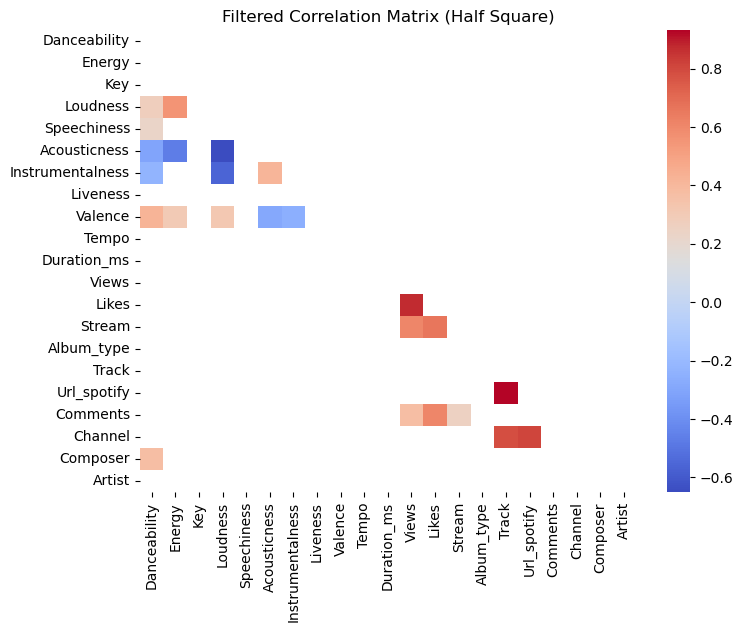

In [18]:
corr_matrix_with_threshold(df_train_embedding_important, 0.2)

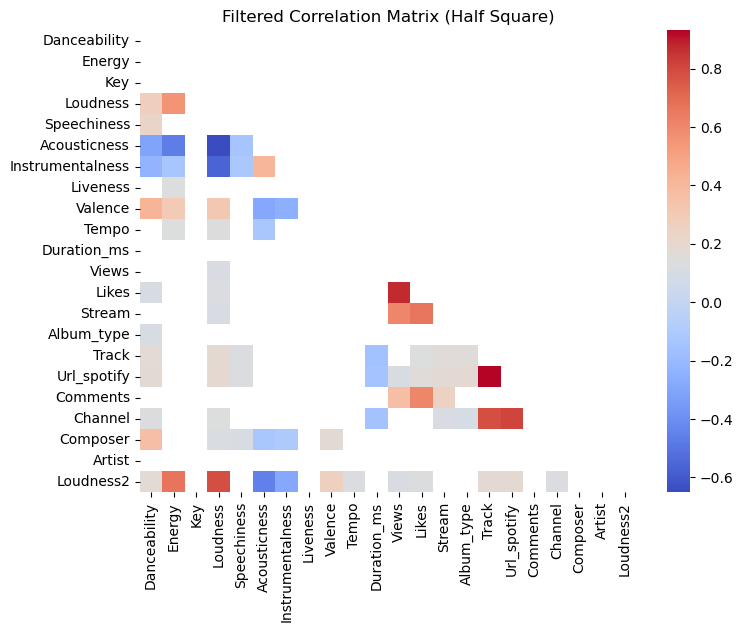

In [48]:
import math

def convert_decibel_to_numerical(dB_value):
    return 10**(dB_value / 10)

def feature_combination(df):
    df_connecting_tmp = df.copy()
#     df_connecting_tmp['Extra1'] = df_connecting_tmp['Valence']  * df_connecting_tmp['Url_spotify'] 
#     df_connecting_tmp['Extra2'] = df_connecting_tmp['Channel']  * df_connecting_tmp['Instrumentalness']
#     df_connecting_tmp['Extra3'] = df_connecting_tmp['Channel']  * df_connecting_tmp['Acousticness']
#     df_connecting_tmp['Extra2'] = df_connecting_tmp['Instrumentalness']  * df_connecting_tmp['Channel']
    df_connecting_tmp['Loudness2'] = df_connecting_tmp['Loudness'].apply(lambda x: convert_decibel_to_numerical(x)) 
    return df_connecting_tmp

df_train_feature_combination = feature_combination(df_train_embedding_important)
df_test_feature_combination = feature_combination(df_test_embedding_important)
corr_matrix_with_threshold(df_train_feature_combination, 0.1)

* Danceability ==> Valence: 0.424102 | Composer: 0.295219| Loudness: 0.275222 | Speechiness:0.228473|  Acousticness:-0.309605| Instrumentalness: -0.231177 | Likes: 0.103480| 
* Valence      ==> Loudness: 0.319542  |  Energy: 0.305514  |  Acousticness: -0.288254  | Instrumentalness: -0.258984  | Composer: 0.143226
* Composer     ==> Valence: 0.143226 | 
* Loudness     ==> Energy: 0.559834 | Valence: 0.319542 |Tempo: 0.146088	| Acousticness: -0.651000 |Instrumentalness: -0.563593 |  Views: 0.110302 | Likes: 0.123328 | Stream: 0.112378
* Speechiness  ==> Acousticness: -0.141015 |Instrumentalness: -0.113436
* Acousticness ==> Energy: -0.471571 | Loudness: -0.651000 |Instrumentalness: 0.416931| Energy: -0.471571 | Tempo: -0.127284
* Instrumentalness ==> Energy: -0.135264 | Loudness: -0.563593| Acousticness: 0.416931| Valence: -0.258984
* Likes ==> Views: 0.871248 |Stream: 0.664720 |Comments: 0.609587| Loudness:0.123328

In [75]:
arr_NOT_important_column = [ 'Url_spotify', 'Channel', 'Tempo', "Composer", 'Likes', 'Stream', 'Energy', 'Views', 'Track', 'Key', 'Liveness', 'Duration_ms',  'Album_type', 'Comments','Artist', 'Composer'  ]
# Without Feature Combination
# df_train_embedding_important_simple = remove_unimportant_column(df_train_embedding_important, arr_NOT_important_column)
# df_test_embedding_important_simple = remove_unimportant_column(df_test_embedding_important, arr_NOT_important_column)

# With Feature Combination
df_train_embedding_important_simple = remove_unimportant_column(df_train_feature_combination, arr_NOT_important_column)
df_test_embedding_important_simple = remove_unimportant_column(df_test_feature_combination, arr_NOT_important_column)

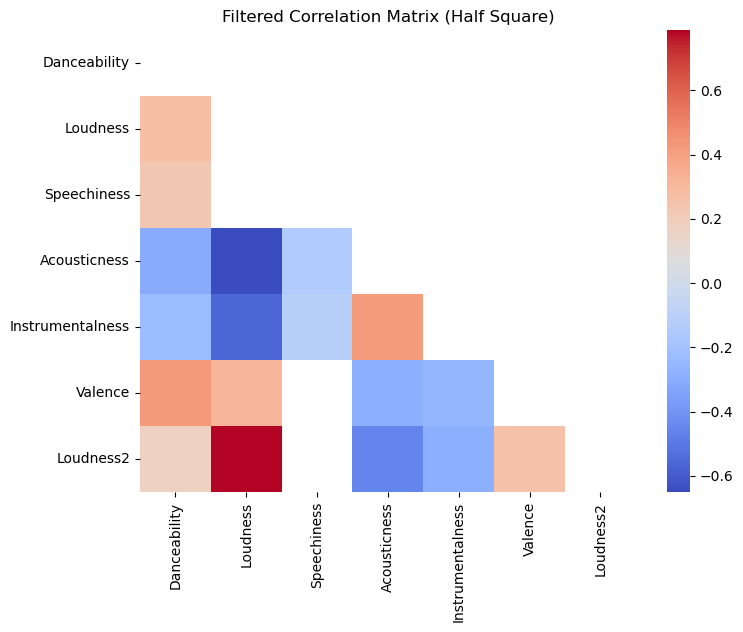

In [76]:
corr_matrix_with_threshold(df_train_embedding_important_simple, 0.1)

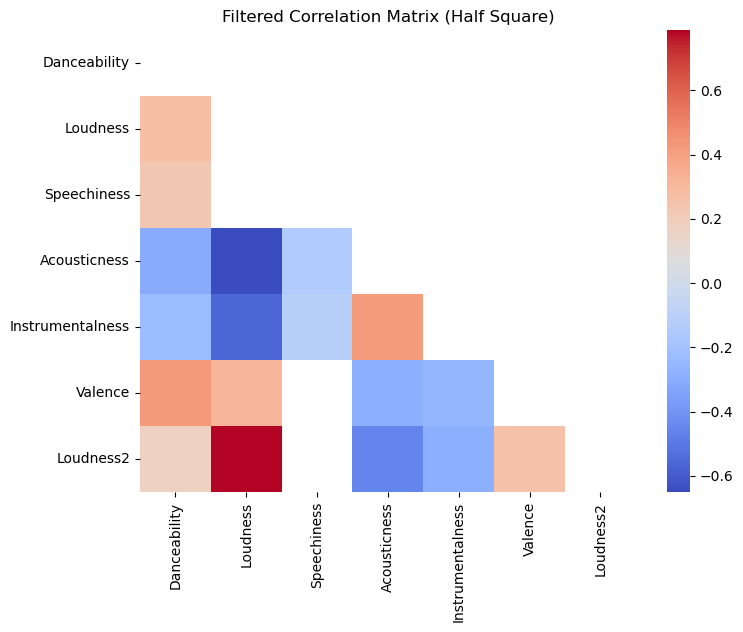

In [77]:
corr_matrix_with_threshold(df_train_embedding_important_simple, 0.1)

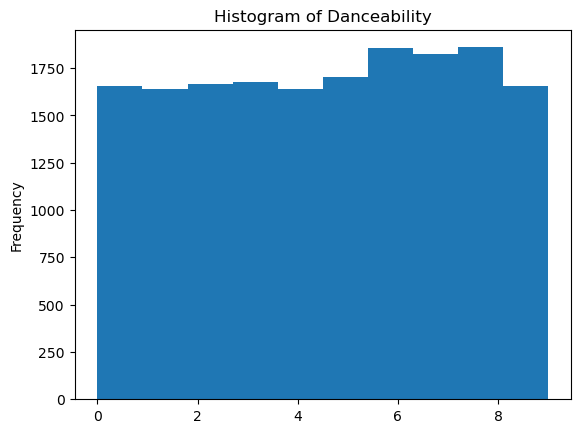

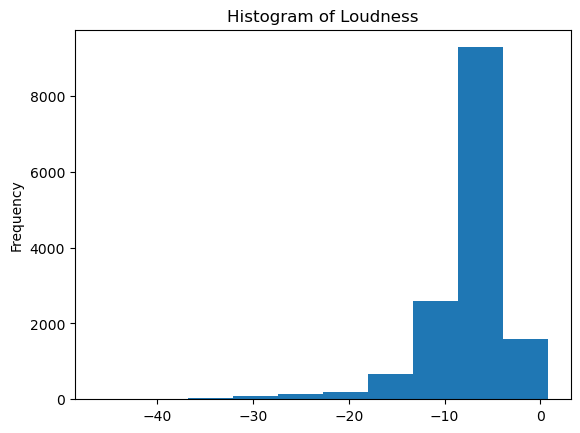

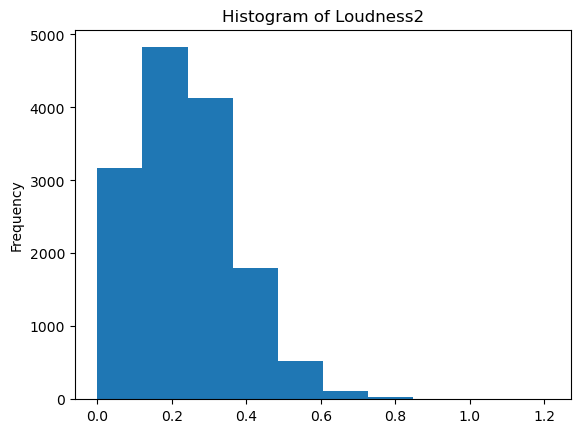

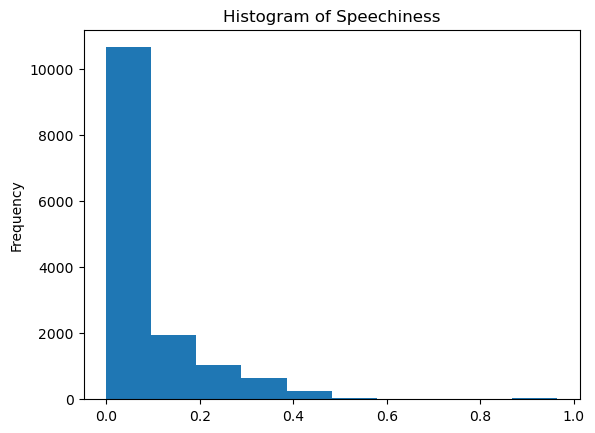

In [78]:
import matplotlib.pyplot as plt
def plot_hist(df, column):
    df[column].plot.hist(title=f'Histogram of {column}', xlabel='Value', ylabel='Frequency')
    plt.show()
plot_hist(df_train_embedding_important_simple, 'Danceability')
plot_hist(df_train_embedding_important_simple, 'Loudness')
plot_hist(df_train_embedding_important_simple, 'Loudness2')
plot_hist(df_train_embedding_important_simple, 'Speechiness')


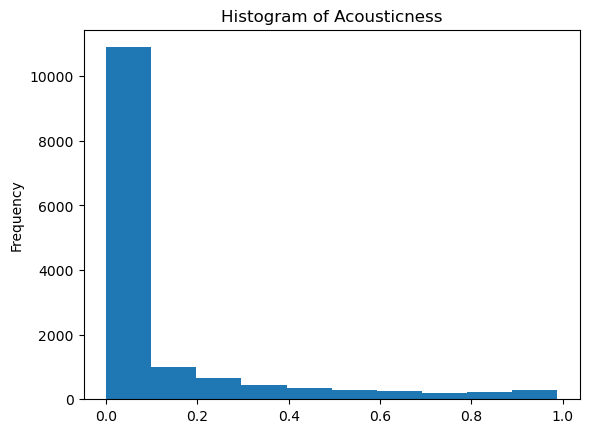

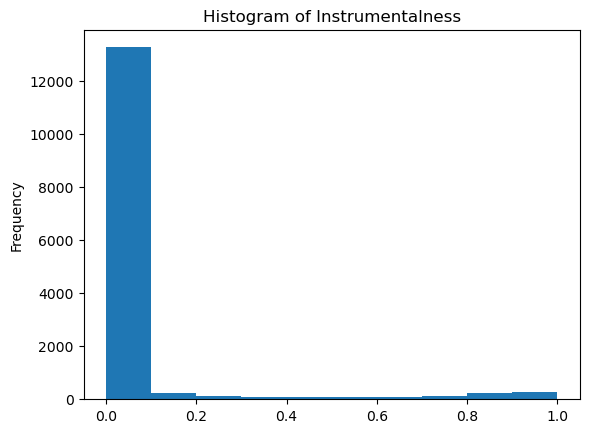

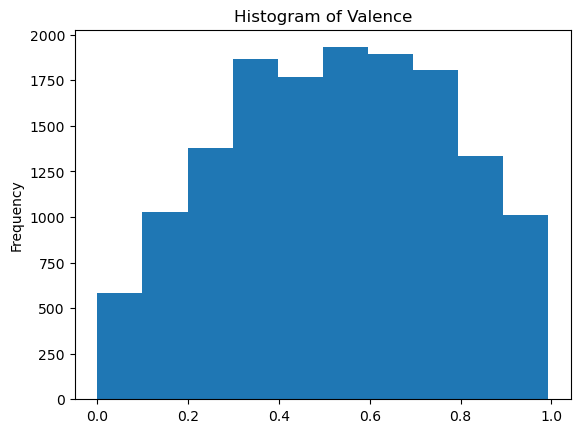

In [79]:
plot_hist(df_train_embedding_important_simple, 'Acousticness')
plot_hist(df_train_embedding_important_simple, 'Instrumentalness')
plot_hist(df_train_embedding_important_simple, 'Valence')


In [80]:
# plot_hist(df_train_embedding_important_simple, 'Likes')
# plot_hist(df_train_embedding_important_simple, 'Stream')
# plot_hist(df_train_embedding_important_simple, 'Channel')

In [81]:
min(df_train_embedding_important_simple['Loudness2'].values)

2.3708277395462832e-05

In [82]:
max(df_train_embedding_important_simple['Loudness2'].values)

1.210319415118767

In [83]:
# we got around 5500 clean data without N/A
# it means that it got around 12000 non-clean data

df_with_clean_data = df_train_embedding_important_simple.dropna()
print("Clean Data without NaN:", len(df_with_clean_data))
print("Data with NaN:", len(df_train_embedding_important_simple) - len(df_with_clean_data))


Clean Data without NaN: 7683
Data with NaN: 9487


# Imputation "Composer" START

### Using df_with_clean_data (7k-ish) as training for guessing NaN values 

In [84]:
df_for_training_imputation = df_with_clean_data.copy()
df_for_training_imputation

,Danceability,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,Loudness2
0,0.0,-25.176,0.0443,7.241508e-01,0.000062,0.3400,0.003037
7,6.0,-6.630,0.0414,4.983603e-05,0.000000,0.8790,0.217270
11,3.0,-5.173,0.0589,2.781813e-08,0.000002,0.7590,0.303879
12,2.0,-7.310,0.0341,5.088448e-03,0.000000,0.2910,0.185780
14,1.0,-29.372,0.0364,9.211673e-01,0.915000,0.2260,0.001156
...,...,...,...,...,...,...,...
17159,4.0,-4.619,0.0614,6.908071e-10,0.000000,0.4380,0.345223
17160,5.0,-3.055,0.0373,7.301384e-06,0.227000,0.6920,0.494880
17163,0.0,-7.198,0.0376,1.643032e-12,0.000354,0.0544,0.190634
17165,3.0,-6.344,0.0328,8.991539e-02,0.000000,0.6580,0.232060


In [85]:
df_for_training_imputation_non_danceability = df_for_training_imputation.iloc[:,1:]
df_for_training_imputation_non_danceability

,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,Loudness2
0,-25.176,0.0443,7.241508e-01,0.000062,0.3400,0.003037
7,-6.630,0.0414,4.983603e-05,0.000000,0.8790,0.217270
11,-5.173,0.0589,2.781813e-08,0.000002,0.7590,0.303879
12,-7.310,0.0341,5.088448e-03,0.000000,0.2910,0.185780
14,-29.372,0.0364,9.211673e-01,0.915000,0.2260,0.001156
...,...,...,...,...,...,...
17159,-4.619,0.0614,6.908071e-10,0.000000,0.4380,0.345223
17160,-3.055,0.0373,7.301384e-06,0.227000,0.6920,0.494880
17163,-7.198,0.0376,1.643032e-12,0.000354,0.0544,0.190634
17165,-6.344,0.0328,8.991539e-02,0.000000,0.6580,0.232060


## Imputer using KNN
### Naturally works well with continous range of target label

In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
def generate_model_for_imputation_nan_with_KNN(df, important_columns, target_column):
    print(target_column)
    y = df[target_column]
    X = df.drop(target_column, axis=1)
    X = X[important_columns]
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = KNeighborsRegressor(n_neighbors=3)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(predictions)
    print("Avg", np.mean(y_test))
    mse = mean_squared_error(y_test, predictions)
    print("Mean Squared Error:", mse) 
    print("------------------------------")
    # Calculate the accuracy of the model
    return model
model = generate_model_for_imputation_nan_with_KNN(
    df_for_training_imputation_non_danceability, 
    ['Acousticness', 'Instrumentalness', 'Valence', 'Loudness2'], 
    'Speechiness'
)
model = generate_model_for_imputation_nan_with_KNN(
    df_for_training_imputation_non_danceability, 
    ['Speechiness', 'Instrumentalness', 'Valence', 'Loudness2'], 
    'Acousticness'
)
model = generate_model_for_imputation_nan_with_KNN(
    df_for_training_imputation_non_danceability, 
    ['Speechiness', 'Acousticness', 'Valence', 'Loudness2'], 
    'Instrumentalness'
)
model = generate_model_for_imputation_nan_with_KNN(
    df_for_training_imputation_non_danceability, 
    ['Acousticness', 'Instrumentalness', 'Loudness2', 'Speechiness'], 
    'Valence'
)
model = generate_model_for_imputation_nan_with_KNN(
    df_for_training_imputation_non_danceability, 
    ['Acousticness', 'Instrumentalness', 'Valence', 'Speechiness'], 
    'Loudness2'
)


Speechiness
[0.0998     0.0574     0.21036667 ... 0.135      0.05533333 0.08023333]
Avg 0.09560078074170462
Mean Squared Error: 0.013848652278609123
------------------------------
Acousticness
[0.01391164 0.01216687 0.01186232 ... 0.22116972 0.18431892 0.04630895]
Avg 0.1184322631390646
Mean Squared Error: 0.03101403866137755
------------------------------
Instrumentalness
[0.00000000e+00 1.93333333e-01 0.00000000e+00 ... 4.54033333e-05
 1.10270667e-02 2.89012767e-01]
Avg 0.0594196795575797
Mean Squared Error: 0.02867617930066616
------------------------------
Valence
[0.57466667 0.697      0.69966667 ... 0.30066667 0.57833333 0.52666667]
Avg 0.5257154391672089
Mean Squared Error: 0.06322080528040917
------------------------------
Loudness2
[0.30776459 0.25181087 0.21701813 ... 0.15678085 0.16540886 0.21366033]
Avg 0.23818339391027119
Mean Squared Error: 0.01762636660033472
------------------------------


## Start the imputation proces for every important features

# Imputation "Composer" END

In [ ]:
# Make the clean data to give strength to the dataset
# duplicate 2x to the data training
# so it should dominate the dataset

df_train_embedding_important_simple_added = pd.concat([
    df_train_embedding_important_simple, 
    df_with_clean_data,
    df_with_clean_data,
    df_with_clean_data,
    df_with_clean_data,
    df_with_clean_data,
    df_with_clean_data,
]).sample(frac=1).reset_index(drop=True)

print("After merging Clean data with distorted data:", len(df_train_embedding_important_simple_added))

In [ ]:
def conditioning(df):
    df_ret = df.copy()
    df_ret['Stream'] = np.log(df_ret['Stream'])
    df_ret[df_ret['Stream'] == -np.inf] = 0

    df_ret['Likes'] = np.log(df_ret['Likes'])
    df_ret[df_ret['Likes'] == -np.inf] = 0

    df_ret['Instrumentalness'] = np.log(np.abs(df_ret['Instrumentalness']))
    df_ret[df_ret['Instrumentalness'] == -np.inf] = 0

    df_ret['Loudness'] = np.log(np.abs(df_ret['Loudness']))
    df_ret[df_ret['Loudness'] == -np.inf] = 0
    
    df_ret['Acousticness'] = np.log(np.abs(df_ret['Acousticness']))
    df_ret[df_ret['Acousticness'] == -np.inf] = 0
    
    return df_ret

# df_train_embedding_important_simple_added_conditioning = conditioning(df_train_embedding_important_simple_added)
# df_test_embedding_important_simple_added_conditioning = conditioning(df_test_embedding_important_simple)

df_train_embedding_important_simple_added_conditioning = df_train_embedding_important_simple_added
df_test_embedding_important_simple_added_conditioning = df_test_embedding_important_simple

In [ ]:
plot_hist(df_train_embedding_important_simple_added_conditioning, 'Instrumentalness')
# plot_hist(df_train_embedding_important_simple_added_conditioning, 'Likes')
# plot_hist(df_train_embedding_important_simple_added_conditioning, 'Stream')


In [ ]:
def imputer(df):
    df_ret = df.copy()
    mean_values =  df['Valence'].mean()
    df_ret['Valence'] = df['Valence'].fillna(mean_values)

    mean_values = df['Loudness'].mean()
    df_ret['Loudness'] = df['Loudness'].fillna(mean_values)
    
    mean_values = df['Speechiness'].mean()
    df_ret['Speechiness'] = df['Speechiness'].fillna(mean_values)
    
    mean_values = df['Acousticness'].mean()
    df_ret['Acousticness'] = df['Acousticness'].fillna(mean_values) #0.000000000001)
    
    mean_values = df['Instrumentalness'].mean()
    df_ret['Instrumentalness'] = df['Instrumentalness'].fillna(mean_values)

    df_ret['Composer'] = df['Composer'].fillna(0)

    return df_ret


df_train_embedding_important_simple_imputer_before_scaler = imputer(df_train_embedding_important_simple_added_conditioning)    
df_test_embedding_important_simple_imputer_before_scaler = imputer(df_test_embedding_important_simple_added_conditioning)    


In [ ]:
from sklearn.preprocessing import StandardScaler

def scaler(df_train, df_test):
    df_train_non_y = df_train.iloc[:, 1:]
    df_train_y = df_train.iloc[:, :1]
    len_train = len(df_train_non_y)
    print(len_train)
    df_concatenated = pd.concat([
        df_train_non_y, df_test
    ]).reset_index(drop=True)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df_concatenated)
    df_train_scaled_non_y = pd.DataFrame(X_scaled[:len_train,:], columns=df_concatenated.columns)
    df_train_scaled_with_y = pd.concat([df_train_y, df_train_scaled_non_y], axis=1)
    df_test_scaled = pd.DataFrame(X_scaled[len_train:,:], columns=df_concatenated.columns)
    return df_train_scaled_with_y, df_test_scaled
df_train_embedding_important_simple_imputer, df_test_embedding_important_simple_imputer = scaler(df_train_embedding_important_simple_imputer_before_scaler, df_test_embedding_important_simple_imputer_before_scaler)

In [ ]:
print(df_train_embedding_important_simple_imputer_before_scaler)
print(df_train_embedding_important_simple_imputer)

In [ ]:
corr_matrix_with_threshold(df_train_embedding_important_simple, 0.01, 'Without Imputation (ORI)')


In [ ]:
corr_matrix_with_threshold(df_train_embedding_important_simple_added_conditioning, 0.01, 'Without Imputation (Conditioning)')
corr_matrix_with_threshold(df_train_embedding_important_simple_imputer, 0.01, 'After Imputation (Conditioning)')

In [ ]:
from sklearn.model_selection import train_test_split
# train_features, val_features, train_labels, val_labels = train_test_split(df_train_embedding_important_simple_imputer.iloc[:, 1:], df_train_embedding_important_simple_imputer.iloc[:, :1], test_size = 0.20, random_state = 42)

train_features, val_features, train_labels, val_labels = train_test_split(df_train_embedding_important_simple_imputer.iloc[:, 1:], df_train_embedding_important_simple_imputer.iloc[:, :1], test_size = 0.20, random_state = 42)

In [ ]:
train_features

In [ ]:
train_labels

In [ ]:
val_features

In [ ]:
val_labels

# All Data

# Try Sofi's Ensemble  (Cascade Level 1)
## Main Feature: Loudness, Speechiness, Acousticness, Instrumentalness, Valence, Composer

In [ ]:
class LGBWrapper:
    def __init__(self, params=None, num_boost_round=10):
        self.params = params
        self.num_boost_round = num_boost_round
        self.model = None

    def fit(self, X, y):
        lgb_train = lgb.Dataset(X, y, free_raw_data=False)
        self.model = lgb.train(self.params, lgb_train, num_boost_round=self.num_boost_round)

    def predict(self, X):
        return self.model.predict(X)


In [ ]:
# Prepare LightGBM parameters
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'mae',
    'learning_rate': 0.05,
    'num_leaves': 31,
    'verbose': -1
}

# For XGBRegressor parameters
default_params = {
    'objective': 'reg:squarederror',
    'booster': 'gbtree',
    'n_estimators': 100,
    'learning_rate': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,
    'subsample': 1,
    'colsample_bytree': 1,
    'gamma': 0,
    'reg_alpha': 0,
    'reg_lambda': 1,
    'random_state': 0,
    'n_jobs': -1
}


In [ ]:
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.multiclass import OneVsOneClassifier
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay


import pickle
# scaler = MinMaxScaler(feature_range=(0, 9))
# Instantiate the classfiers and make a list
regressors = [
    DecisionTreeClassifier(max_depth=None),
    ExtraTreesClassifier(),
    LGBWrapper(params, num_boost_round=200),
    RandomForestRegressor(n_estimators=1000, random_state=42),
    RandomForestRegressor(n_estimators=2000, random_state=42),
    XGBRegressor(**default_params),
    OneVsOneClassifier(AdaBoostClassifier(random_state=42), n_jobs=6),
]
# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['regressors', 'mae', 'accuracy'])

# Train and evaluate each classifier
for reg in regressors:
    print("Processing Regressor:", reg.__class__.__name__)
    reg.fit(train_features, np.ravel(train_labels))
    pred = reg.predict(val_features)
    accuracy = accuracy_score(np.ravel(val_labels), np.rint(pred))
    mae = mean_absolute_error(np.ravel(val_labels), np.rint(pred))
    pd_tmp = pd.DataFrame({'regressors':[reg.__class__.__name__], 'mae': [mae], 'accuracy': [accuracy]})
    result_table = pd.concat([result_table, pd_tmp])

result_table.set_index('regressors', inplace=True)
result_table.sort_values(by=['mae'], ascending=True)

result_table


In [ ]:
result_table


In [ ]:
print("Mean Accuracy", np.mean(result_table['accuracy']))

In [ ]:
print("Mean Accuracy", np.mean(result_table['accuracy']))

In [ ]:
# train on the full training set
for reg in regressors:
    print("Processing Regressor:", reg.__class__.__name__)
    reg.fit(
        df_train_embedding_important_simple_imputer.iloc[:, 1:],                # Full X data
        np.ravel(df_train_embedding_important_simple_imputer.iloc[:, :1])       # Full Y label
    )

In [ ]:
def ensemble_predict(regressors, X):
    # Initialize an empty array of predictions
    predictions = np.zeros((X.shape[0], len(regressors)))

    # Generate predictions for each regressor
    for i, reg in enumerate(regressors):
        predictions[:, i] = reg.predict(X)

    # Average the predictions
    avg_predictions = predictions.mean(axis=1)

    return avg_predictions, predictions

# Make ensemble predictions
ensemble_predictions_l1, all_predictions = ensemble_predict(regressors, df_test_embedding_important_simple_imputer)


In [ ]:
import datetime

current_datetime = datetime.datetime.now()
datetime_string = current_datetime.strftime("%Y%m%d_%H%M")

predictionsTest = ensemble_predictions_l1
preds = np.rint(predictionsTest)
preds = preds.astype(int)
preds = pd.DataFrame(preds, columns=['Danceability'])
preds['id'] = preds.index + 17170
preds = preds[['id', 'Danceability']]
preds.to_csv('L1_cascade_' + datetime_string + '.csv', index=False)

In [ ]:
np.rint(predictionsTest)

# Start Cascade Level 1.5
## => Do "reinforcement" using last 7 submission (with high MAE)

In [ ]:
df_hasil = pd.DataFrame()

tmp = pd.read_csv('old1.csv')
tmp = tmp.drop('id', axis=1)
df_hasil = pd.concat([df_hasil, tmp], axis=1)
df_hasil = pd.concat([df_hasil, tmp], axis=1)
df_hasil = pd.concat([df_hasil, tmp], axis=1)
df_hasil = pd.concat([df_hasil, tmp], axis=1)


In [ ]:

for t in range(2,8):
    tmp = pd.read_csv('old'+ str(t) +'.csv')
    tmp = tmp.drop('id', axis=1)
    df_hasil = pd.concat([df_hasil, tmp], axis=1)

# print(df_hasil)
label_test = df_hasil.mean(axis=1)

tmp_danceability = pd.DataFrame(np.rint(label_test), columns=['Danceability'])
concat_cheat = pd.concat([tmp_danceability, df_test_embedding_important_simple_imputer ], axis=1)



In [ ]:
pd_new_generated = pd.concat([df_train_embedding_important_simple_imputer, concat_cheat, concat_cheat])
pd_new_generated = pd_new_generated.sample(frac=1).reset_index(drop=True)
pd_new_generated

In [ ]:
# Train using Full Training dataset + slight-cheating majority from previous submission
result_table = pd.DataFrame(columns=['regressors', 'mae', 'accuracy'])

# Train and evaluate each classifier
for reg in regressors:
    print("Processing Regressor:", reg.__class__.__name__)
    reg.fit(pd_new_generated.iloc[:, 1:], np.ravel(pd_new_generated.iloc[:, :1]))    
    pred = reg.predict(val_features)
    accuracy = accuracy_score(np.ravel(val_labels), np.rint(pred))
    mae = mean_absolute_error(np.ravel(val_labels), np.rint(pred))
    pd_tmp = pd.DataFrame({'regressors':[reg.__class__.__name__], 'mae': [mae], 'accuracy': [accuracy]})
    result_table = pd.concat([result_table, pd_tmp])

result_table.set_index('regressors', inplace=True)
result_table.sort_values(by=['mae'], ascending=True)


In [ ]:
result_table

In [ ]:
print("Mean Accuracy", np.mean(result_table['accuracy']))

In [ ]:
result_table

In [ ]:
print("Mean Accuracy", np.mean(result_table['accuracy']))

In [ ]:
# Make ensemble predictions
ensemble_predictions_l2, all_predictions = ensemble_predict(regressors, df_test_embedding_important_simple_imputer)


In [ ]:
current_datetime = datetime.datetime.now()
datetime_string = current_datetime.strftime("%Y%m%d_%H%M")

predictionsTest = ensemble_predictions_l2
preds = np.rint(predictionsTest)
preds = preds.astype(int)
preds = pd.DataFrame(preds, columns=['Danceability'])
preds['id'] = preds.index + 17170
preds = preds[['id', 'Danceability']]
preds.to_csv('L1.5_cascade_' + datetime_string + '.csv', index=False)

In [ ]:
all_predictions.shape

# Start Cascade Level 2
## Main Feature: Key, Loudness, Tempo

## NB: This part still on progress

In [ ]:
arr_NOT_important_column_l2 = [ 'Energy', 'Valence', 'Album_type', 'Track', 'Comments', 'Channel', 'Composer', 'Artist', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Duration_ms', 'Views', 'Likes', 'Stream', 'Uri', 'Url_spotify', 'Url_youtube', 'Description', 'id', 'Licensed', 'official_video', 'Title', 'Album']
df_train_embedding_important_l2 = remove_unimportant_column(df_train_embedding, arr_NOT_important_column_l2)
df_test_embedding_important_l2 = remove_unimportant_column(df_test_embedding, arr_NOT_important_column_l2)
df_train_embedding_important_l2

In [ ]:
df_train_embedding_important_l2_clean = df_train_embedding_important_l2.dropna()
df_train_embedding_important_l2_clean

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def imputer_l2(df):
    df_ret = df.copy()
    df_ret['Key'] = df['Key'].fillna(-1)

    mean_values = df['Loudness'].mean()
    df_ret['Loudness'] = df['Loudness'].fillna(mean_values)
    
    mean_values = df['Tempo'].mean()
    df_ret['Tempo'] = df['Tempo'].fillna(mean_values)
    
    return df_ret


df_train_embedding_important_l2_clean_imputer = imputer_l2(df_train_embedding_important_l2_clean)    
df_test_embedding_important_simple_l2_imputer = imputer_l2(df_test_embedding_important_l2)    
print(df_train_embedding_important_l2_clean)
print(df_train_embedding_important_l2_clean_imputer)

In [ ]:
corr_matrix_with_threshold(df_train_embedding_important_l2_clean, 0.01, 'Without Imputation (Conditioning)')
corr_matrix_with_threshold(df_train_embedding_important_l2_clean_imputer, 0.01, 'After Imputation (Conditioning)')

In [ ]:
from sklearn.model_selection import train_test_split
train_features_l2, val_features_l2, train_labels_l2, val_labels_l2 = train_test_split(df_train_embedding_important_l2_clean_imputer.iloc[:, 1:], df_train_embedding_important_l2_clean_imputer.iloc[:, :1], test_size = 0.20, random_state = 42)

In [ ]:
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

regressors_l2 = [
    LGBWrapper(params, num_boost_round=200),
    RandomForestRegressor(n_estimators=1000, random_state=42),
    RandomForestRegressor(n_estimators=2000, random_state=42),
    XGBRegressor(**default_params),
    OneVsOneClassifier(AdaBoostClassifier(n_estimators=3, random_state=42)),
    SVC(kernel='rbf', gamma='auto'),
]
# Define a result table as a DataFrame
result_table_l2 = pd.DataFrame(columns=['regressors', 'mae', 'accuracy'])

# Train and evaluate each classifier
for reg in regressors_l2:
    print("Processing Regressor:", reg.__class__.__name__)
    reg.fit(train_features_l2, np.ravel(train_labels_l2))
    pred = reg.predict(val_features_l2)
    accuracy = accuracy_score(np.ravel(val_labels_l2), np.rint(pred))
    mae = mean_absolute_error(np.ravel(val_labels_l2), np.rint(pred))
    pd_tmp = pd.DataFrame({'regressors':[reg.__class__.__name__], 'mae': [mae], 'accuracy': [accuracy]})
    result_table_l2 = pd.concat([result_table_l2, pd_tmp])

result_table_l2.set_index('regressors', inplace=True)
result_table_l2.sort_values(by=['mae'], ascending=True)
result_table_l2